# Probability Calibration Curve
Machine Learning with Imbalanced Data - Course

In this notebook, we will plot probability calibration curves for logistic regression predictions made from balanced and imbalanced datasets.

Probability calibration curves allow us to visualize if the classifier returns calibrated probabilities.

Logistic regression returns calibrated probabilities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

import warnings
warnings.filterwarnings('ignore')

## Function to create toy data

In [2]:

def create_dataset(weights):

    # returns arrays
    X, y = make_classification(
        n_samples=10000,
        n_features=10,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=[weights],  # to balance (or not) the classes
        class_sep=1,  # how separated the classes are
        random_state=1)

    # trasform arrays into pandas df and series
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    return X, y

## Create a balanced dataset

In [3]:
X, y = create_dataset(weights=0.5)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.658803,0.829669,-0.144299,1.023428,-1.202420,0.143194,1.442737,0.105750,0.639316,-0.015008
1,-0.257548,2.483056,0.379567,-2.254821,-0.072324,1.609488,-0.660558,0.463669,-0.244913,0.311547
2,-0.308108,1.457985,0.369361,1.295003,-1.813459,0.200404,0.199826,-0.401978,-0.365098,0.533825
3,-0.023793,1.319102,-1.614718,-0.397581,-0.092439,0.789002,-0.261107,-0.750842,1.650654,1.747664
4,1.078281,1.551971,-1.647722,2.509523,0.314624,-1.146409,-1.244661,-0.469266,1.982250,0.422053


In [5]:
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: proportion, dtype: float64

## Separate into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0,
)

X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [7]:
# balancing ratio
y_train.value_counts(normalize=True)

0    0.500875
1    0.499125
Name: proportion, dtype: float64

## Train logisic regression

In [9]:
logit = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    C=1,
    random_state=0,
    max_iter=100,
).fit(X_train, y_train)

# score the test set
probs = logit.predict_proba(X_test)[:,1]

## Calibration curve

https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve 
* sorts the probability values into bins
* determines the true positive fraction in those bins

In [10]:
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test,
    probs,
    n_bins=10,
    strategy='uniform',
)

len(mean_predicted_value), len(fraction_of_positives)

(10, 10)

In [ ]:
# mean probability of each interval / bin

mean_predicted_value

array([0.03491051, 0.14351451, 0.24643116, 0.34498521, 0.45397316,
       0.54594532, 0.65111565, 0.74978709, 0.85667285, 0.97669516])

In [12]:
# fraction of observations of the minority class
# in each interval of probability

fraction_of_positives

array([0.03626943, 0.14948454, 0.2       , 0.28947368, 0.44444444,
       0.43859649, 0.69491525, 0.80645161, 0.87179487, 0.98611111])

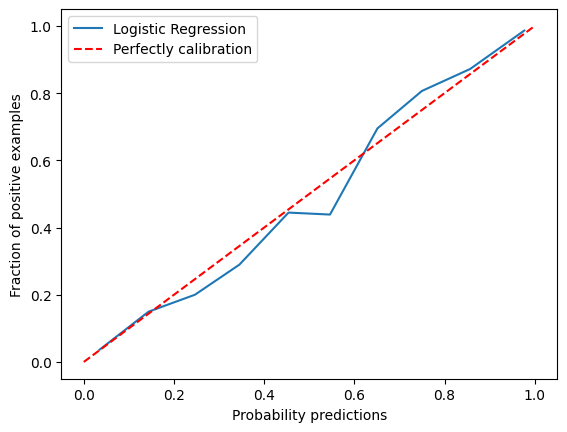

In [13]:
# plot calibration curve
plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')

# plot perfecet calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='--', color='red', label='Perfectly calibration')

# add labels and legend
plt.xlabel('Probability predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

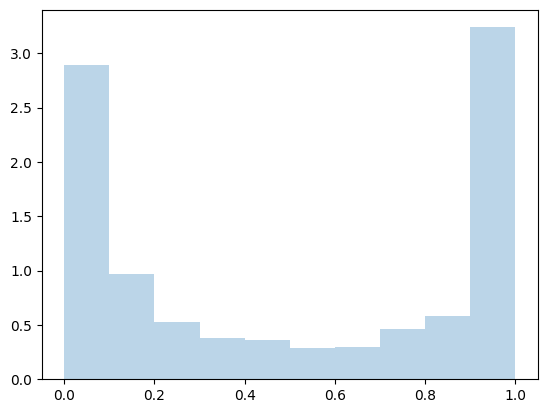

In [14]:
# plot number of observation per prediction interval

plt.hist(probs, range=(0, 1), bins=10, density=True, stacked=True, alpha=0.3)
plt.show()

In [15]:
# bring all together

def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)
    
    max_val = max(mean_predicted_value)
    
    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')
    
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

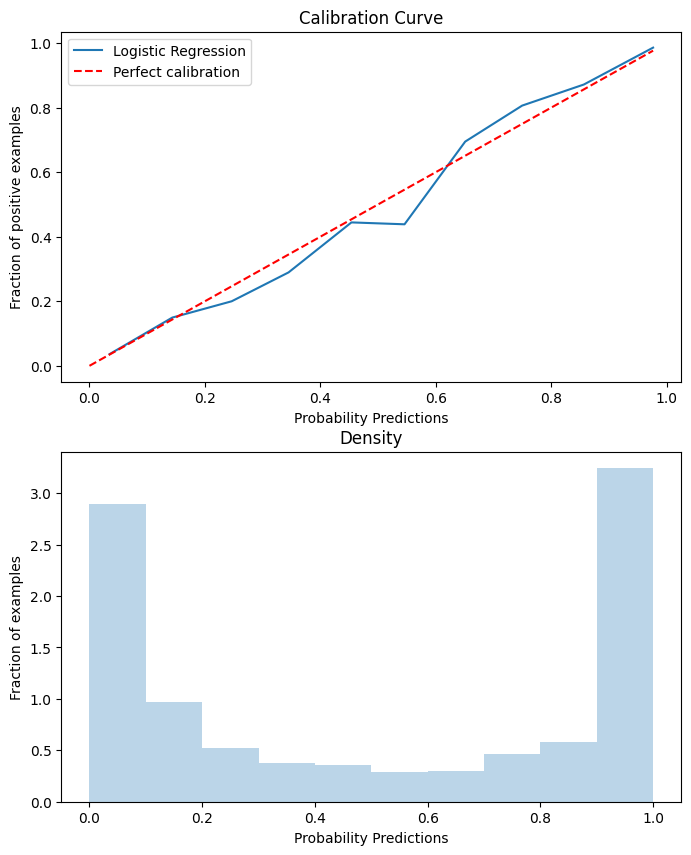

In [16]:
plot_calibration_curve(y_test, probs, bins=10, strategy='uniform')

## Change number of probability bins

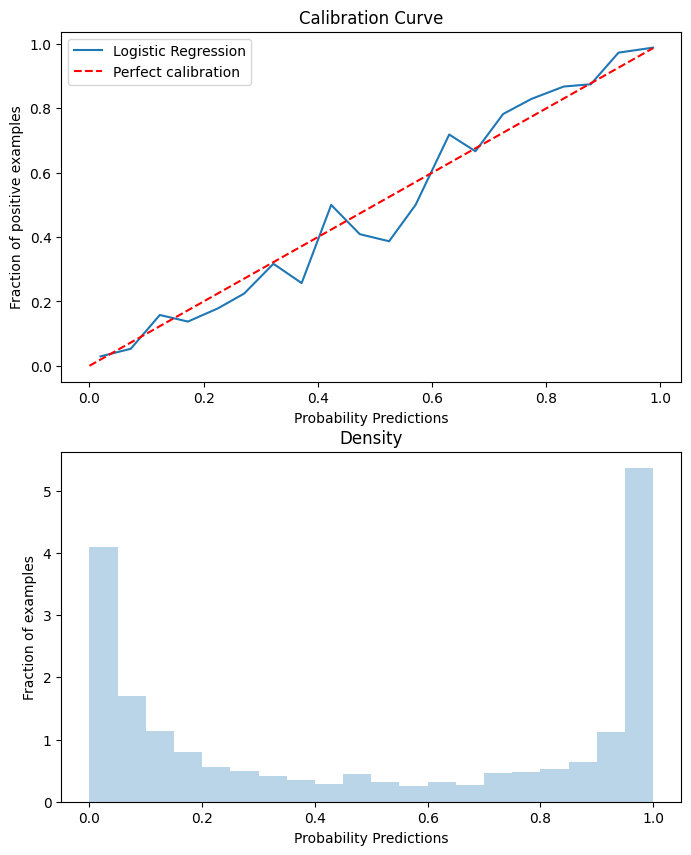

In [17]:
plot_calibration_curve(y_test, probs, bins=20, strategy='uniform')

The less observations we have per interval, the harder to obtain a reliable probability vs. positive fraction estimate.

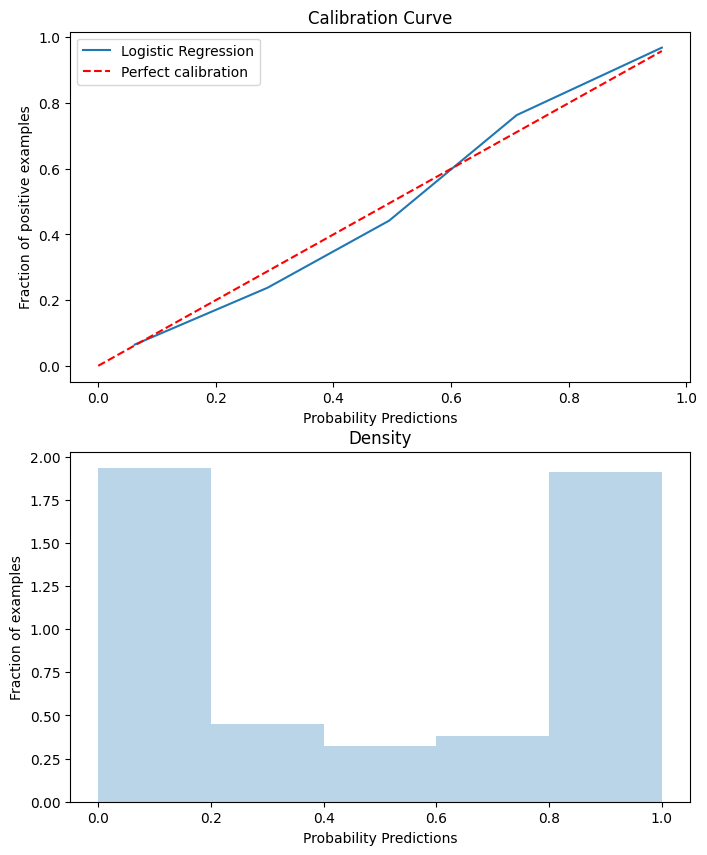

In [18]:
plot_calibration_curve(y_test, probs, bins=5, strategy='uniform')

## Imbalanced dataset

In [19]:
X, y = create_dataset(weights=0.9)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((7000, 10), (3000, 10))

In [21]:
# train logistic regression
logit = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    C=1,
    random_state=0,
    max_iter=100,
).fit(X_train, y_train)

# score the test set
probs = logit.predict_proba(X_test)[:, 1]

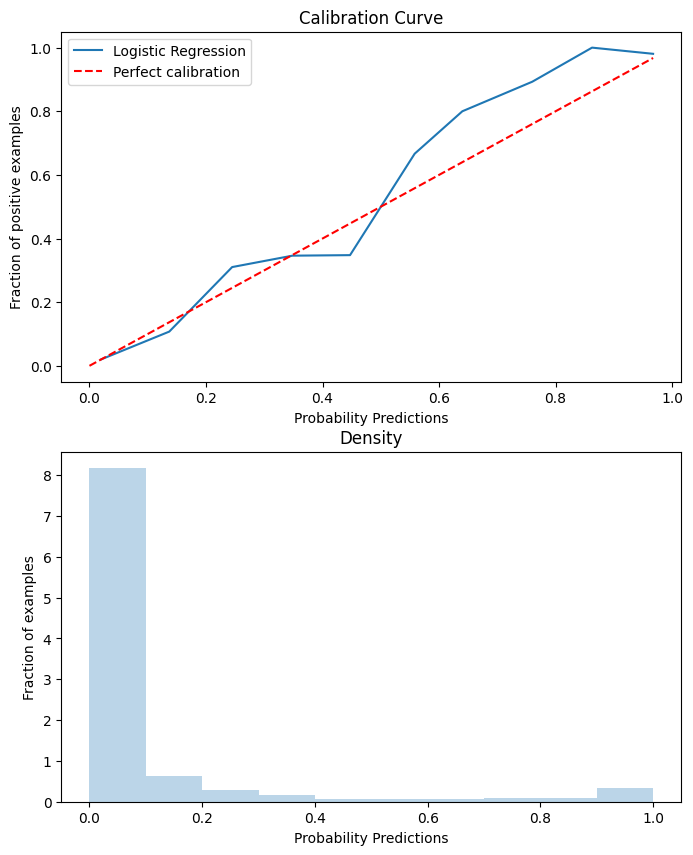

In [22]:
# calibration curve
plot_calibration_curve(y_test, probs, bins=10, strategy='uniform')

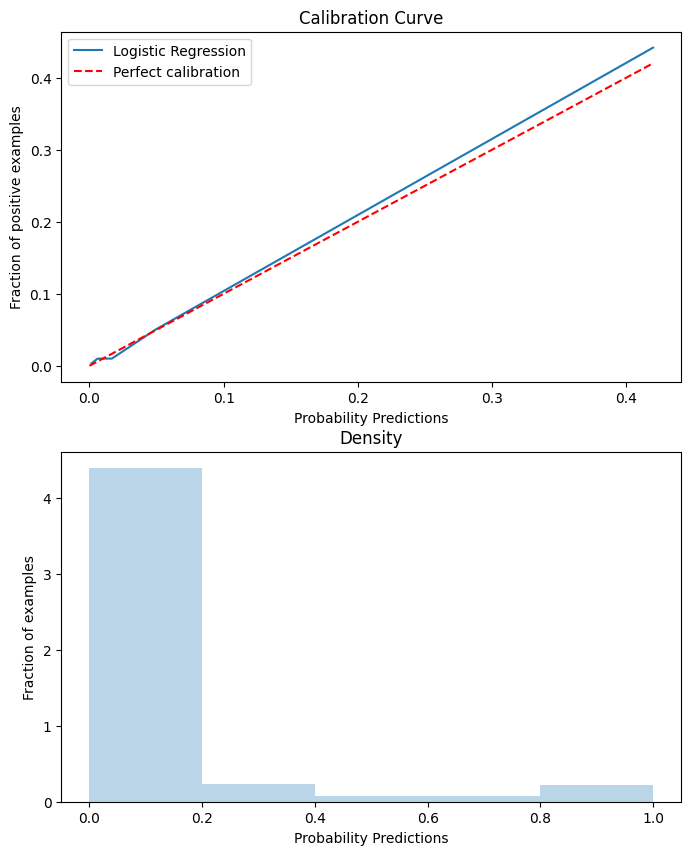

In [23]:
plot_calibration_curve(y_test, probs, bins=5, strategy='quantile')

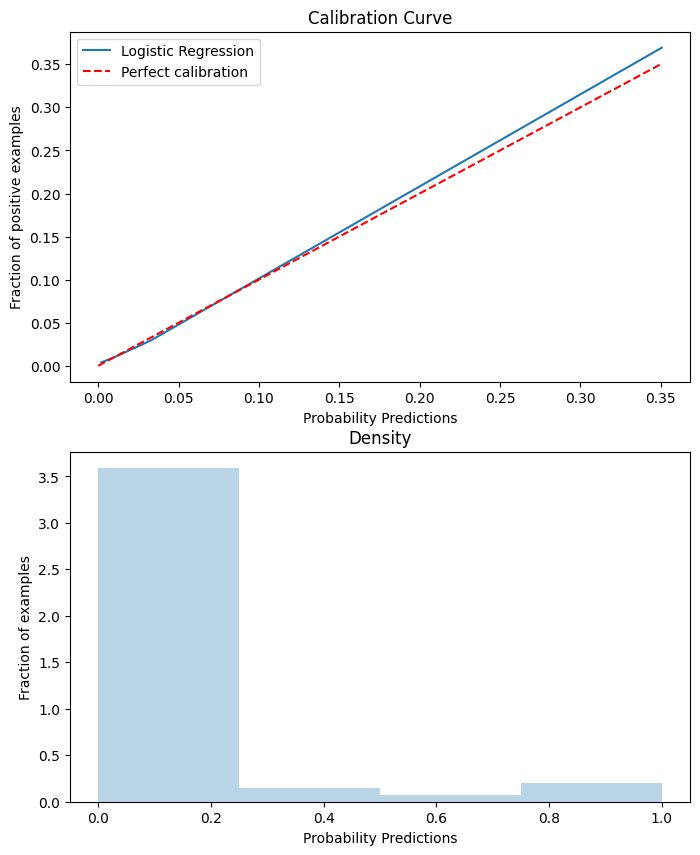

In [24]:

plot_calibration_curve(y_test, probs, bins=4, strategy='quantile')

The predictions do not seem to be balanced. Most likely it is because we do not have a sufficient number of observations of the positive class, to accurately determine the fraction of positives.